## COHORT_ANALYSIS_pf

In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from operator import attrgetter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#df_pf = pd.read_csv('PF_tratados.csv')
df = pd.read_csv('/home/hub/Área de Trabalho/dados/PJ_tratados.csv')
df.head()

,Unnamed: 0,ID Cliente,Linha de Ação,Produto GPOM,Data de Venda,Cidade,Classe de Serviço,Micro_regiao,Porte,Estado,...,Tipo Pessoa,Setor IBGE,Área de Atuação,Área de Atuação e Produto GPOM,Tempo de Contrato,Longitude,Latitude,Código CNAE,Descrição CNAE,Divisão CNAE
0,0,550,EDUCACAO,EDUCACAO EXECUTIVA,2021-07-29,CURITIBA,PROGRAMAS NACIONAIS DE EDUCACAO EXECUTIVA,CURITIBA,GRANDE,PR,...,JURÍDICA,04. SERVIÇOS,NÃO INFORMADO,EDUCACAO EXECUTIVA / NÃO INFORMADO,Menos de 1 ano,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49
1,2,550,EDUCACAO,EDUCACAO EXECUTIVA,2022-12-01,CURITIBA,CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...,CURITIBA,GRANDE,PR,...,JURÍDICA,04. SERVIÇOS,NÃO INFORMADO,EDUCACAO EXECUTIVA / NÃO INFORMADO,1 a 2 anos,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49
2,3,550,EDUCACAO,EDUCACAO EXECUTIVA,2022-12-15,CURITIBA,CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...,CURITIBA,GRANDE,PR,...,JURÍDICA,04. SERVIÇOS,NÃO INFORMADO,EDUCACAO EXECUTIVA / NÃO INFORMADO,Menos de 1 ano,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49
3,4,367,EDUCACAO,EDUCACAO EXECUTIVA,2023-10-16,CURITIBA,CURSOS E PROGRAMAS NACIONAIS EM GESTAO EMPRESA...,CURITIBA,MÉDIA,PR,...,JURÍDICA,04. SERVIÇOS,NÃO INFORMADO,EDUCACAO EXECUTIVA / NÃO INFORMADO,Menos de 1 ano,-49.264622,-25.419547,8599-6/99,OUTRAS ATIVIDADES DE ENSINO NÃO ESPECIFICADAS ...,85
4,5,550,EDUCACAO,GRADUACAO,2022-11-24,CURITIBA,GRADUACAO TECNOLOGICA A DISTANCIA,CURITIBA,GRANDE,PR,...,JURÍDICA,04. SERVIÇOS,NÃO INFORMADO,GRADUACAO / NÃO INFORMADO,Menos de 1 ano,-49.264622,-25.419547,4911-6/00,TRANSPORTE FERROVIÁRIO DE CARGA,49


In [3]:
df.describe()

,Unnamed: 0,Longitude,Latitude,Divisão CNAE
count,79059.000000,79059.000000,79059.000000,79059.000000
mean,40258.362931,-51.173333,-24.841829,34.673598
std,23228.872275,1.634104,0.978503,21.945439
min,0.000000,-54.582689,-26.483868,1.000000
25%,20211.500000,-52.549736,-25.469663,18.000000
50%,40209.000000,-51.169100,-25.292487,28.000000
75%,60327.500000,-49.404748,-23.742534,46.000000
max,81008.000000,-46.372772,-22.654967,96.000000


## Cohort Analisis

**Para análise de coorte, precisamos de três rótulos: sales date, cohort group and cohort period/index**

In [4]:
df['Data de Venda'] = pd.to_datetime(df['Data de Venda'], format='%Y/%m/%d')

**Criando as variáveis cohort e order_month. Cohort é o coorte mensal com base na primeira data de compra e o order_month é o mês truncado da data de compra**

In [5]:
df['order_month'] = df['Data de Venda'].dt.to_period('M')

In [6]:
df['cohort'] = df.groupby('ID Cliente')['Data de Venda'].transform('min').dt.to_period('M')

**Agregando os dados por cohort e order_month e contando o número de clientes únicos em cada grupo**

In [7]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('ID Cliente', 'nunique')).reset_index(drop=False)

In [8]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [9]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2019-01,2019-01,2,0
1,2019-01,2021-03,1,26
2,2019-01,2021-04,1,27
3,2019-01,2021-05,1,28
4,2019-01,2023-03,1,50


**Agregando os dados por cohort e order_month e contar o número de clientes únicos em cada grupo**

In [10]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

In [11]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,56
cohort,,,,,,,,,,,,,,,,,,,,,
2019-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2019-02,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2019-04,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2019-06,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,1.0,1.0,1.0,NaN,1.0,2.0,2.0,NaN,NaN
2019-07,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Convertendo a tabela para ver com mais clareza**

In [12]:
cohort_size = cohort_pivot.iloc[:, 0]

In [13]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

**Matriz de retenção como um mapa de calor**

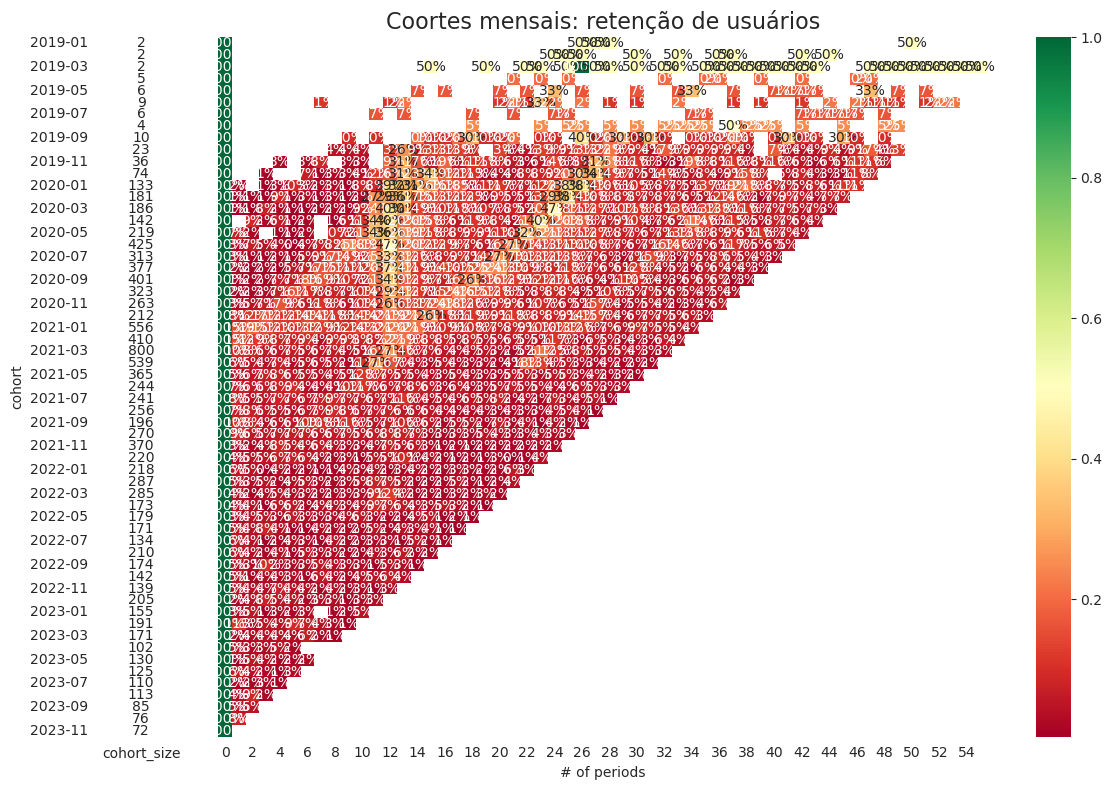

In [14]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Coortes mensais: retenção de usuários', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

**Engajamento por usuário ao longo do tempo**

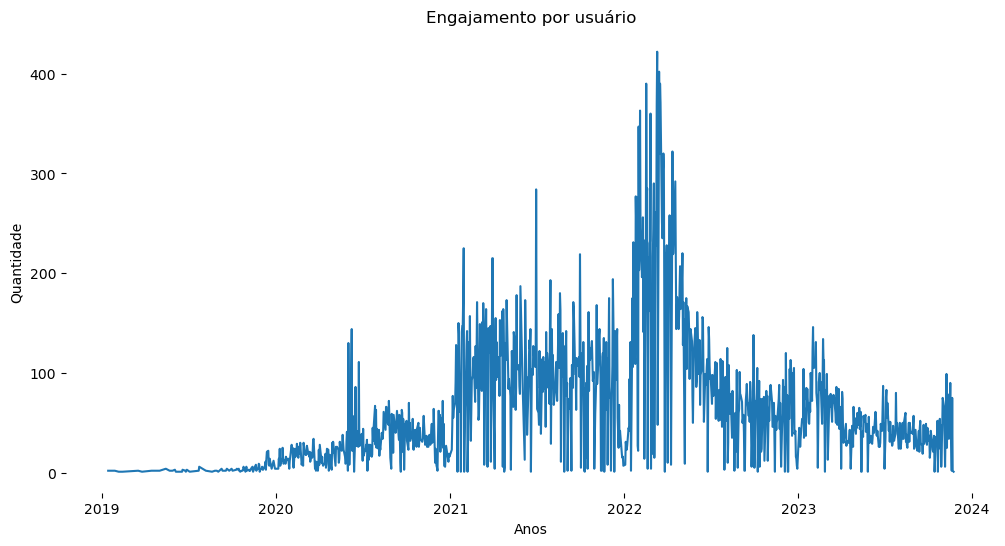

In [15]:
plt.figure(figsize=(12, 6))
aux = df[['ID Cliente', 'Data de Venda']].groupby('Data de Venda', as_index = False).count()
sns.lineplot(data = aux, x = 'Data de Venda', y = 'ID Cliente')
plt.title('Engajamento por usuário')


sns.despine(bottom=True, left=True)
plt.ylabel('Quantidade', fontsize=10)
plt.xlabel('Anos', fontsize=10);